In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from IPython.display import Image
from keras.utils.vis_utils import plot_model
from tensorflow import keras
from keras import Sequential
from keras.layers import Activation, Dropout, Conv2D, Dense, MaxPooling2D, Flatten

In [ ]:
dataset = keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = dataset.load_data()

In [ ]:
print("Dataset de entrenamiento: ", X_train.shape)
print("Dataset de prueba: ", X_test.shape)

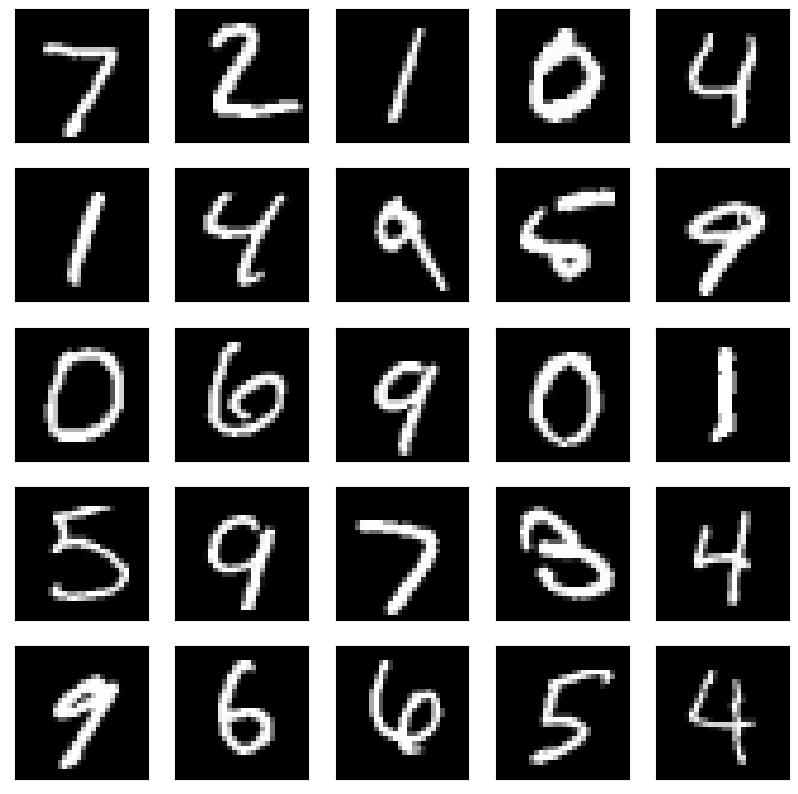

In [14]:
_, ax = plt.subplots(5, 5, figsize=(10, 10))
index = 0

for i in range(5):
    for j in range(5):
        cell = ax[i][j]
        cell.set_xticks([])
        cell.set_yticks([])
        cell.grid(False)
        cell.imshow(X_test[index], cmap='gray')
        index += 1
        
plt.show()

In [15]:
X_train = X_train / 255.0
X_test = X_test / 255.0

print(X_train[0:1, 10:15, 10: 15])

[[[[1.53787005e-05]
   [2.36831988e-03]
   [3.89081123e-03]
   [1.38408304e-03]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [2.13763937e-03]
   [3.89081123e-03]
   [2.92195309e-03]
   [3.07574010e-05]]

  [[0.00000000e+00]
   [1.69165705e-04]
   [2.92195309e-03]
   [3.89081123e-03]
   [1.07650903e-03]]

  [[0.00000000e+00]
   [0.00000000e+00]
   [5.38254517e-04]
   [3.70626682e-03]
   [3.46020761e-03]]

  [[0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   [1.24567474e-03]
   [3.69088812e-03]]]]


In [16]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [17]:
# Complete code
convnet = Sequential([
    #Conv2D(32, (3, 3), activation='relu', padding='same', strides=(2,2), input_shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.5),

    #Clasificador
    Flatten(),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

In [18]:
img = plot_model(convnet, show_shapes=True, show_layer_names=True, to_file='model.png')
#Image(filename='train/model.png')
img

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [19]:
# Complete code
convnet.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
n_iter = 10

hist = convnet.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=n_iter)

Epoch 1/10
1875/1875 [==============================] - 328s 173ms/step - loss: 2.3016 - accuracy: 0.1120 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 2/10
1875/1875 [==============================] - 331s 177ms/step - loss: 2.3015 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 3/10
 227/1875 [==>...........................] - ETA: 4:55 - loss: 2.3002 - accuracy: 0.1194

KeyboardInterrupt: 